In [ ]:
! pip3 install google-cloud-vision
! pip3 install Pillow==8.3.1

In [1]:
import io
from google.cloud import vision
from PIL import Image, ImageDraw, ImageFont

In [2]:
client = vision.ImageAnnotatorClient()

In [3]:
path = "./data/frames/mi_csk/mi_csv_frame000350.png"

with io.open(path, 'rb') as image_file:
    content = image_file.read()
    
image = vision.Image(content=content)

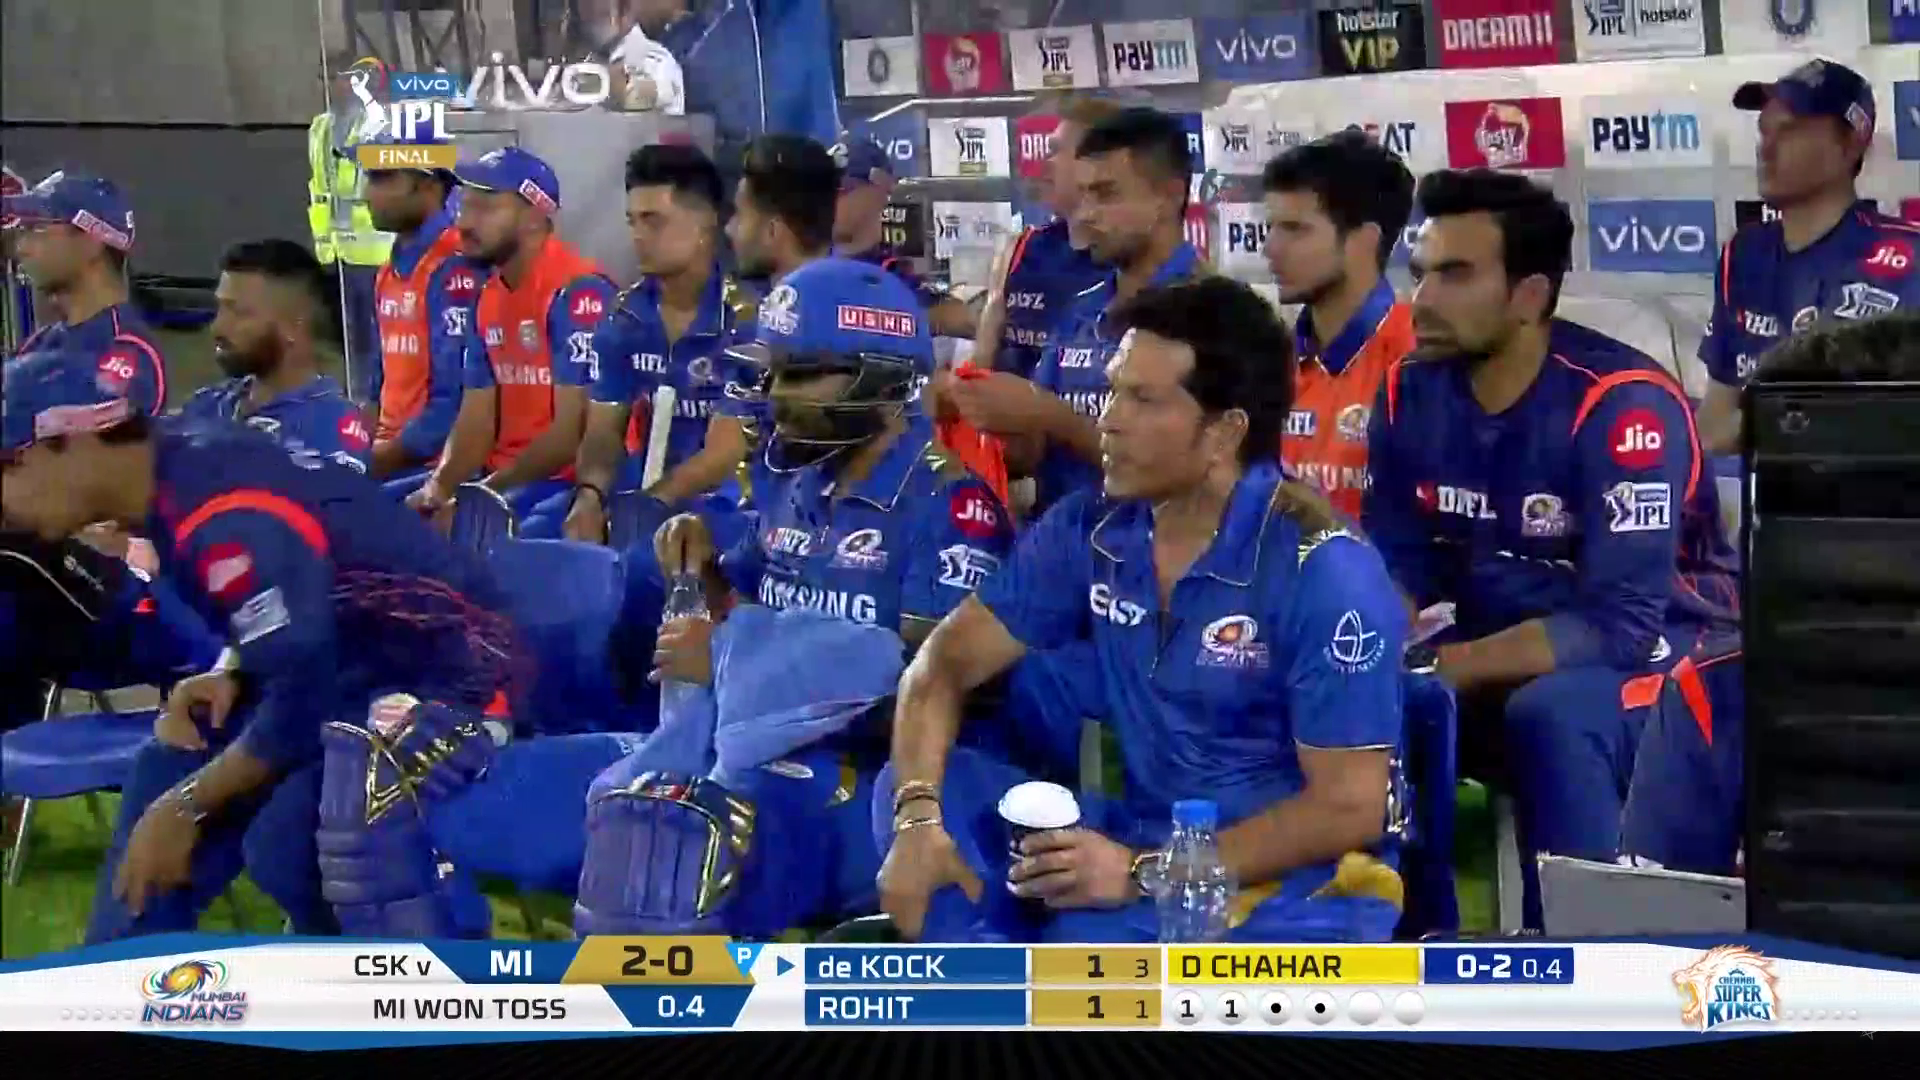

In [43]:
img = Image.open(path)
img 

In [5]:
logo_response = client.logo_detection(image=image, max_results =20)

In [6]:
for logo in logo_response.logo_annotations :
    print(logo.description)

Paytm
DIRECTV
Chennai
Indian Premier League


In [18]:
img1 = ImageDraw.Draw(img) 
font = ImageFont.truetype("./utils/fonts/arial.ttf", 30)

for logo in logo_response.logo_annotations:
    
    xmin = logo.bounding_poly.vertices[0].x
    ymin = logo.bounding_poly.vertices[0].y
    xmax = logo.bounding_poly.vertices[2].x
    ymax = logo.bounding_poly.vertices[2].y
    
    box = [(xmin, ymin), (xmax, ymax)]
    print(f"Logo :{logo.description} @ {box}")

    img1.rectangle(box, outline ="red", width=4)
    img1.text((xmin, ymin-25),logo.description, "green", font=font)


Logo :Paytm @ [(1586, 103), (1703, 160)]
Logo :DIRECTV @ [(1427, 3), (1560, 66)]
Logo :Chennai @ [(1667, 940), (1791, 1033)]
Logo :Indian Premier League @ [(341, 62), (462, 174)]


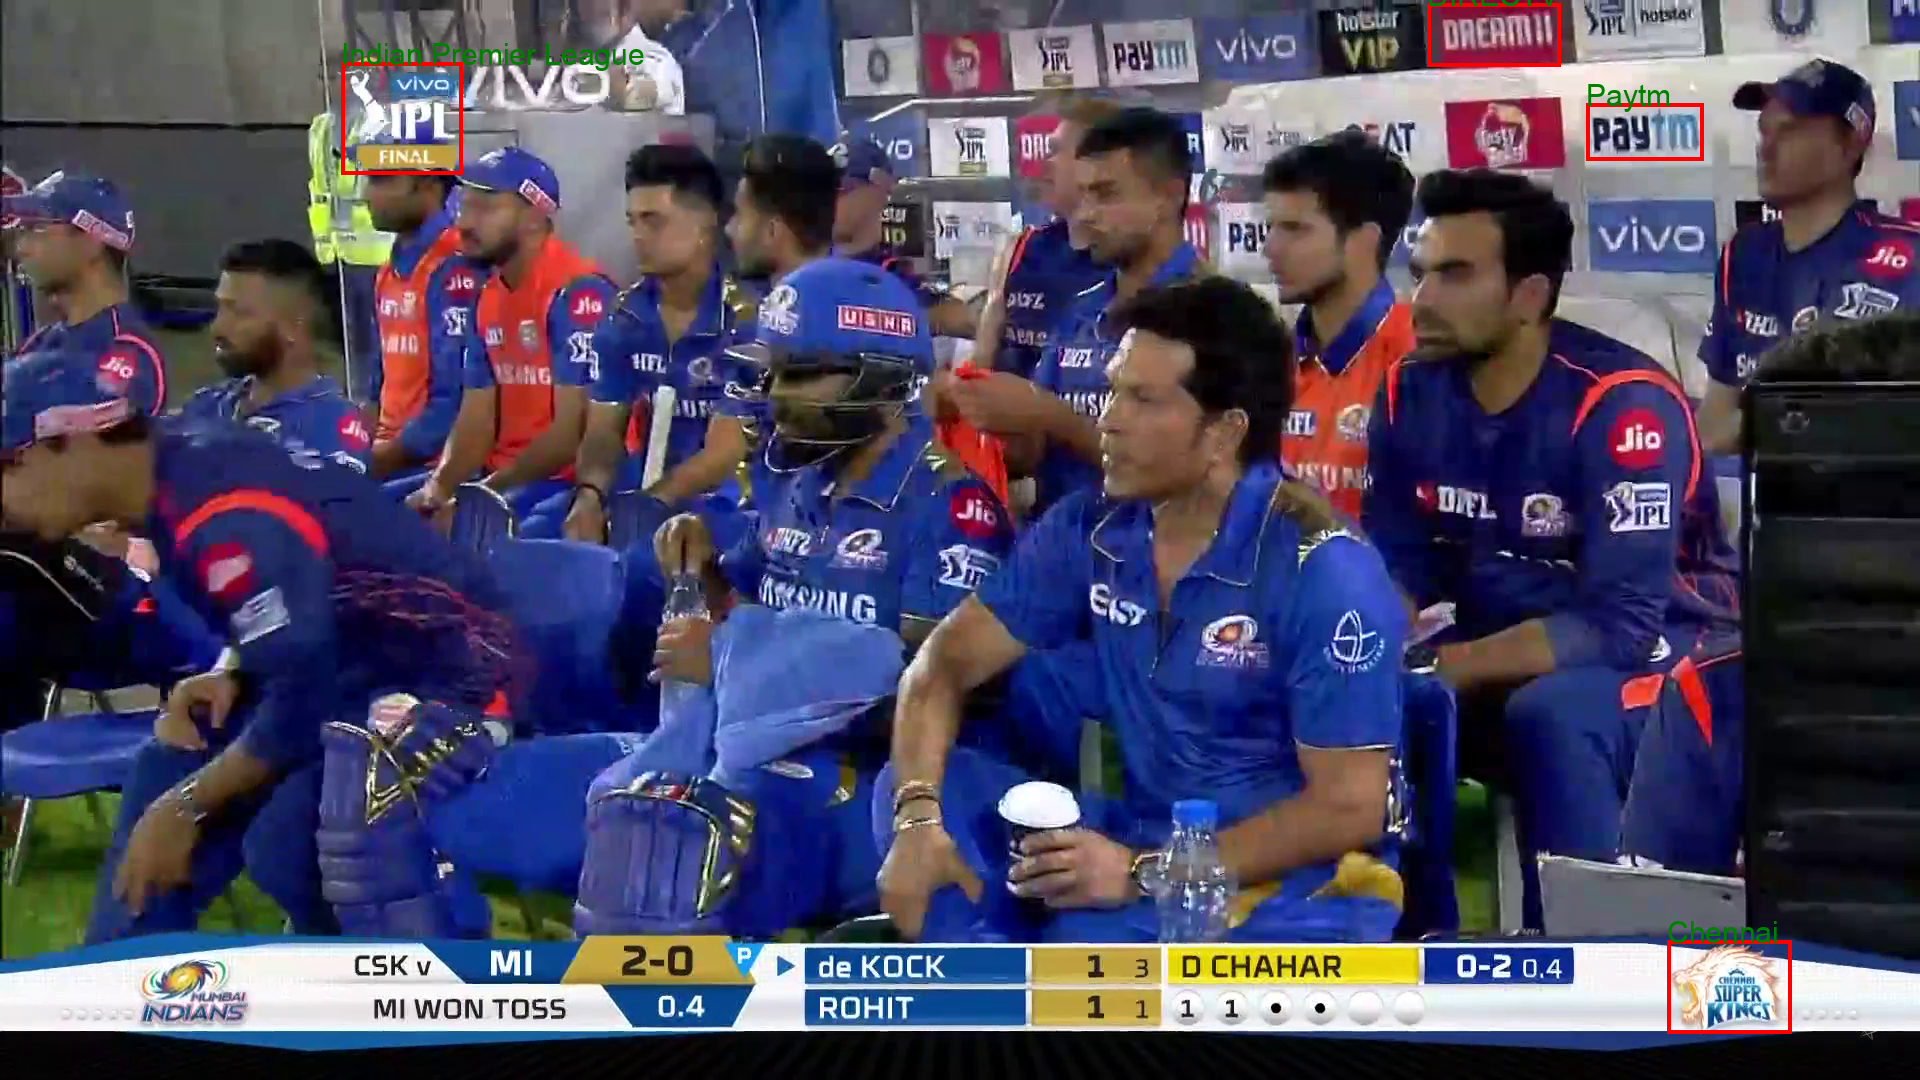

In [19]:
img

In [24]:
text_response = client.text_detection(image=image)

In [27]:
for text in text_response.text_annotations:
    print(text.description)

hotstar
hotsta
DREAMII S
Paytm vivo
VIP
vivo
IPL
vivo
A AT
Paytm
DAC
Testy
FINAL
ster
ID
Pa
vivo
Jio
Jla
HFL
ASANG
FL
Jio
Jio
DIEL
EST
CSK v
MI
2-0
D CHAHAR
0-2 0.4
1 3
1 1
de KOCK
SUPER
KINGS
NUMBAI
INDIANS
MI WON TOSS
0.4
ROHIT
1 1
BE

hotstar
hotsta
DREAMII
S
Paytm
vivo
VIP
vivo
IPL
vivo
A
AT
Paytm
DAC
Testy
FINAL
ster
ID
Pa
vivo
Jio
Jla
HFL
ASANG
FL
Jio
Jio
DIEL
EST
CSK
v
MI
2-0
D
CHAHAR
0-2
0.4
1
3
1
1
de
KOCK
SUPER
KINGS
NUMBAI
INDIANS
MI
WON
TOSS
0.4
ROHIT
1
1
BE


In [51]:
img = Image.open(path)
img1 = ImageDraw.Draw(img) 
font = ImageFont.truetype("./utils/fonts/arial.ttf", 30)

for text in text_response.text_annotations :
    if len(text.description) > 20:
        continue
    xmin = text.bounding_poly.vertices[0].x
    ymin = text.bounding_poly.vertices[0].y
    xmax = text.bounding_poly.vertices[2].x
    ymax = text.bounding_poly.vertices[2].y
    
    box = [(xmin, ymin), (xmax, ymax)]
    print(f"Logo :{text.description} @ {box}")

    img1.rectangle(box, outline ="green", width=4)
    img1.text((xmin, ymin-25),text.description, "red", font=font, stroke_width=1)


Logo :hotstar @ [(1337, 12), (1398, 28)]
Logo :hotsta @ [(1640, 7), (1691, 20)]
Logo :DREAMII @ [(1443, 19), (1551, 43)]
Logo :S @ [(1573, 8), (1620, 45)]
Logo :Paytm @ [(1105, 40), (1197, 70)]
Logo :vivo @ [(1216, 33), (1295, 55)]
Logo :VIP @ [(1342, 38), (1409, 74)]
Logo :vivo @ [(454, 44), (681, 118)]
Logo :IPL @ [(370, 98), (457, 138)]
Logo :vivo @ [(397, 76), (447, 91)]
Logo :A @ [(1185, 124), (1209, 159)]
Logo :AT @ [(1374, 121), (1413, 157)]
Logo :Paytm @ [(1580, 112), (1698, 152)]
Logo :DAC @ [(1021, 132), (1059, 158)]
Logo :Testy @ [(1473, 128), (1519, 147)]
Logo :FINAL @ [(380, 149), (433, 163)]
Logo :ster @ [(879, 207), (906, 221)]
Logo :ID @ [(877, 225), (904, 244)]
Logo :Pa @ [(1217, 218), (1276, 256)]
Logo :vivo @ [(1600, 218), (1703, 251)]
Logo :Jio @ [(1869, 243), (1903, 270)]
Logo :Jla @ [(575, 296), (600, 314)]
Logo :HFL @ [(633, 353), (664, 372)]
Logo :ASANG @ [(490, 363), (553, 386)]
Logo :FL @ [(1287, 412), (1315, 434)]
Logo :Jio @ [(1616, 424), (1659, 450)]
Logo :

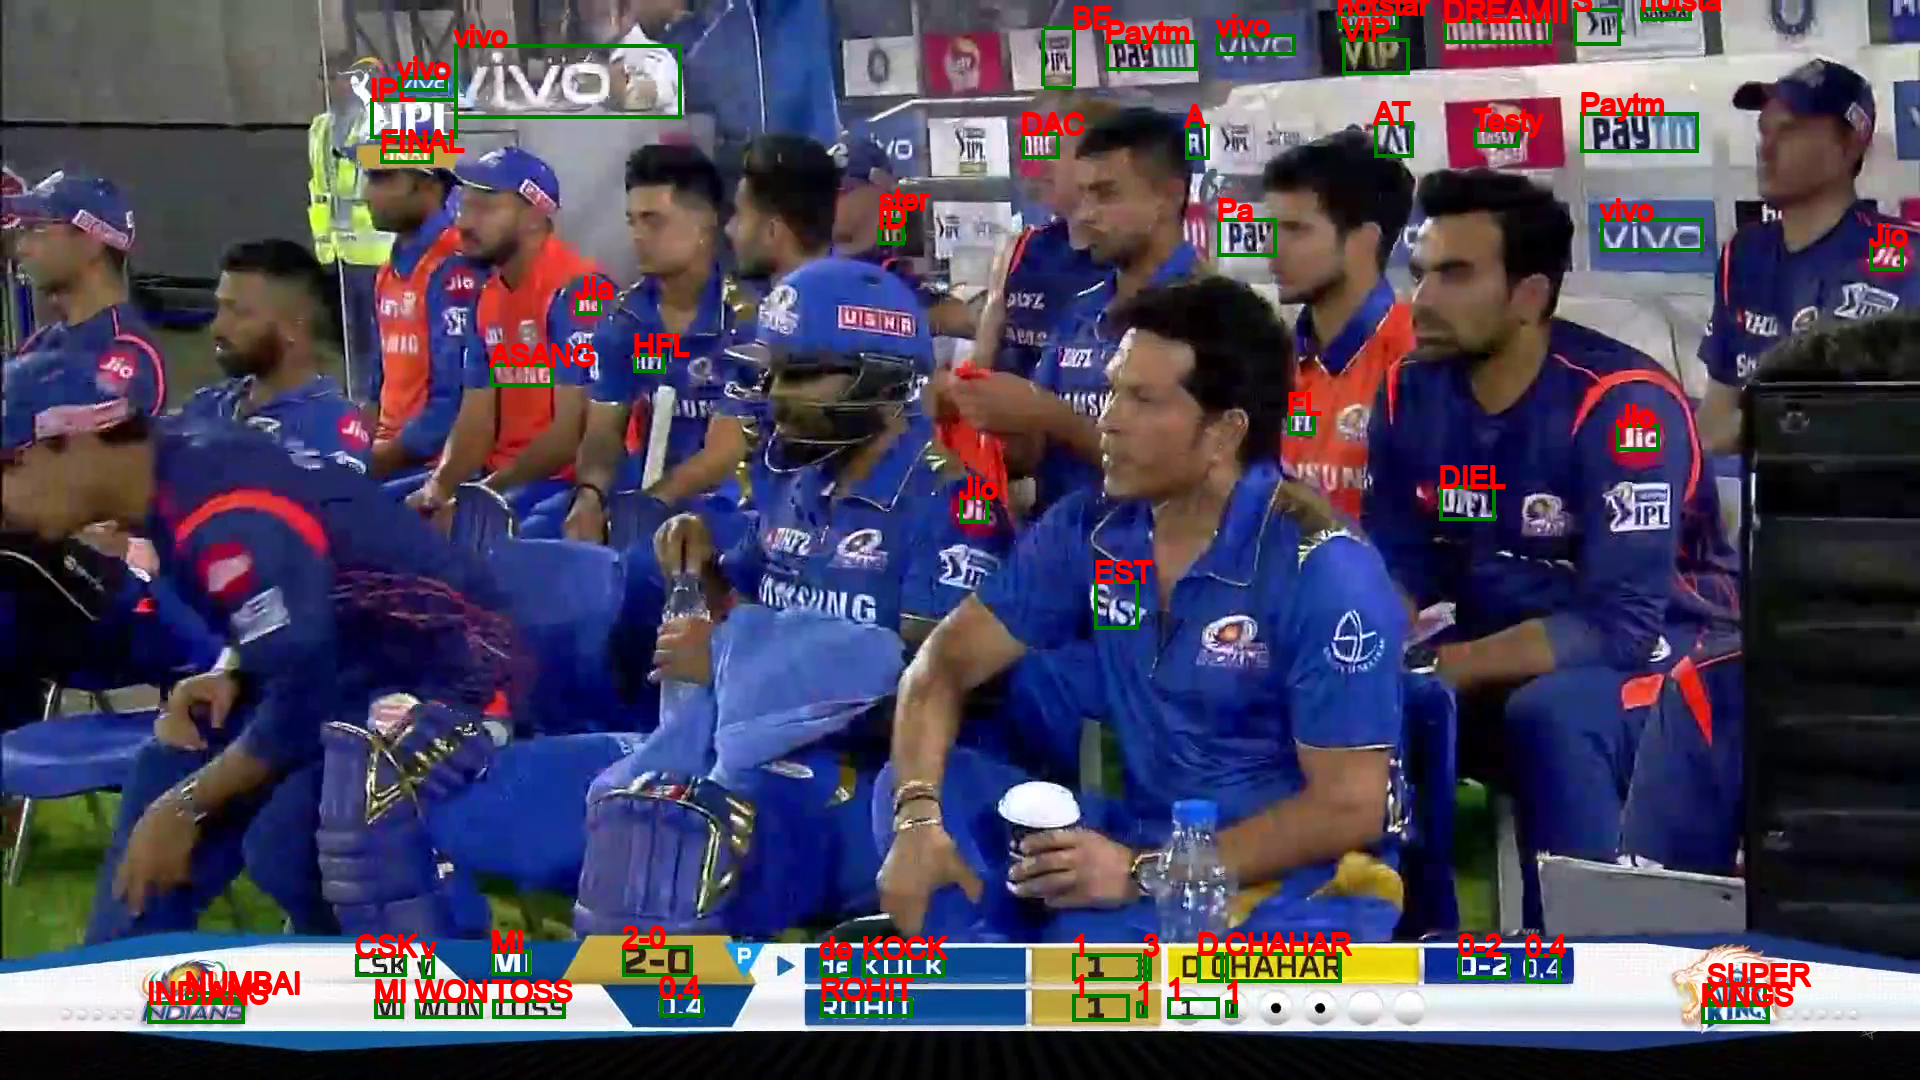

In [52]:
img